In [1]:
import os
import numpy as np
import pandas as pd
from anndata import AnnData
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dict = {"MuSiC": "data/MuSiC.txt",
           "CSx": "data/CibersortX.txt",
           "Scaden": "data/Scaden.txt",
           "TAPE-O": "data/TAPE-O.txt",
           "TAPE-A": "data/TAPE-A.txt",
           "DISSECT": "data/DISSECT.txt"}

In [3]:
sns.set(style="whitegrid", font_scale=1.3)

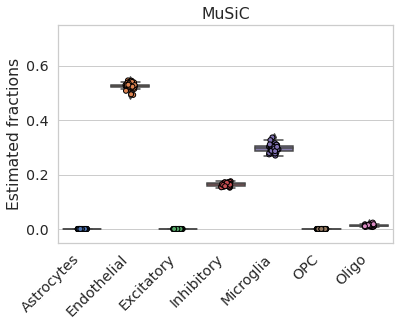

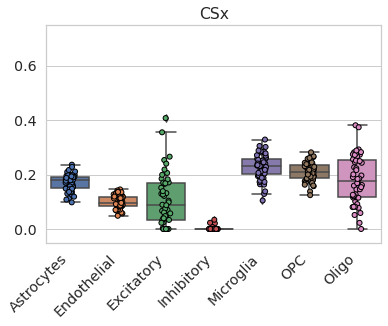

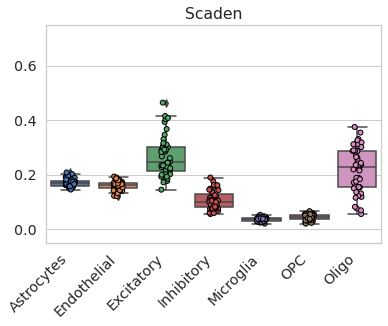

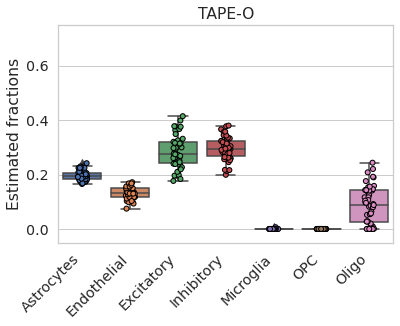

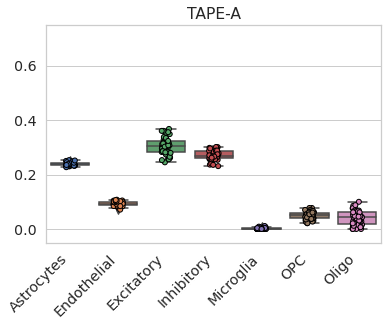

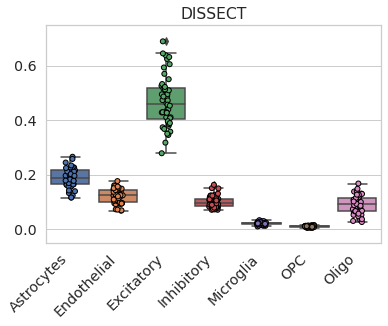

In [4]:
for method in df_dict:
    df_est = pd.read_table(df_dict[method], index_col=0)
    df_meta = pd.read_csv("data/cohort_excluded_outliers.csv", index_col=0)
    df_est.index = [idx.replace(".","-") for idx in df_est.index]
    order = sorted(df_est.columns.tolist())
    
    df_est = df_est[[col for col in df_est.columns if col!="unknown"]]
    df_est = df_est.div(df_est.sum(1), 0)
    
    df_meta = df_meta.loc[df_est.index][["Sex", "Condition", "CellLine"]]
    
    df_est["ratio"] = df_est["Excitatory"]/df_est["Inhibitory"]
    df = pd.concat([df_est, df_meta], axis=1)
    
    df_melt = df.melt(id_vars=["Condition", "Sex", "CellLine"])
    
    df_melt = df_melt[df_melt.Condition=="ctrl"]
    
    ax = sns.boxplot(data=df_melt[df_melt.variable!="ratio"], x="variable", y="value", order=order)
    sns.stripplot(data=df_melt[df_melt.variable!="ratio"], x="variable", y="value", order=order, edgecolor="black", linewidth=1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.xlabel("")
    ax.set_ylim(-0.05,0.75)
    if method==list(df_dict.keys())[0] or method=="TAPE-O":
        plt.ylabel("Estimated fractions")
    else:
        plt.ylabel("")
    plt.title(method)
    plt.savefig("figures/{}.pdf".format(method), bbox_inches="tight")
    plt.show()
    

In [5]:
## ratios

In [6]:
for method in df_dict:
    df_est = pd.read_table(df_dict[method], index_col=0)
    df_est = df_est[[col for col in df_est.columns if col!="unknown"]]
    df_est = df_est.div(df_est.sum(1), 0)
    df_est["ratio"] = df_est["Excitatory"]/df_est["Inhibitory"]
    
    if method==list(df_dict.keys())[0]:
        df_ratios = df_est[["ratio"]]
        df_ratios["method"] = method
        df_ratios.index = ["{}_{}".format(method, str(i)) for i in range(df_ratios.shape[0])]
    else:
        tmp = df_est[["ratio"]]
        tmp["method"] = method
        tmp.index = ["{}_{}".format(method, str(i)) for i in range(tmp.shape[0])]
        df_ratios = pd.concat([df_ratios, tmp], axis=0)
        

/tmp/ipykernel_4134/3936206488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratios["method"] = method
/tmp/ipykernel_4134/3936206488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["method"] = method
/tmp/ipykernel_4134/3936206488.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [7]:
df_ratios_sn = pd.read_table("data/snRNAseq_ratios.txt", index_col=0)

In [8]:
df_ratios = pd.concat([df_ratios_sn, df_ratios], axis=0)

In [9]:
colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#fbafe4']
colors_dict = dict(zip(list(df_dict.keys()), colors))

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0, 0.5, 'Excitatory to inhibitory ratio')

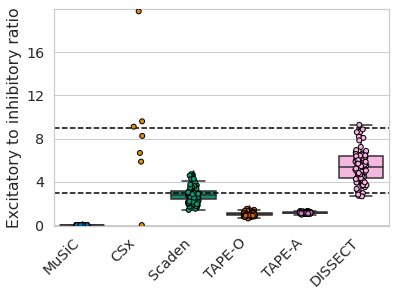

In [10]:
ax = sns.boxplot(data=df_ratios[df_ratios.method!="snRNA-seq"], x="method", y="ratio",
                palette=colors_dict)
sns.stripplot(data=df_ratios[df_ratios.method!="snRNA-seq"], x="method", y="ratio", edgecolor="black", linewidth=1,
             palette=colors_dict)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.axhline(y=3, linestyle="--", color="black")
plt.axhline(y=9, linestyle="--", color="black")
ax.set_ylim(-0.1,20)
plt.yticks(np.arange(0, 20, 4))

plt.xlabel("")
plt.ylabel("Excitatory to inhibitory ratio")
plt.savefig("figures/ratios.png".format(method), bbox_inches="tight")